2.1 Create Environment and open the Chrome Dino Game

Opening Chrome Dino...
Waiting for page to load...
Creating environment...
Using input backend: keyboard
Ablation config: {'blur': True, 'hist_eq': True, 'edge_enhance': False, 'temporal_stack': 1, 'obs_resolution': 'default', 'obs_channels': 'grayscale', 'reward_mode': 'sparse', 'reward_scaling': 1.0, 'action_repeat': 1, 'frame_skip': 1, 'noise_level': 0.0, 'brightness_var': 0.0, 'contrast_var': 0.0}
Observation space: (83, 100, 1)
Dino template loaded
Game Over template loaded
Calibrating regions…
Found game region in frame 1: {'top': 576, 'left': 804, 'width': 610, 'height': 200}
Detected game_region: {'top': 576, 'left': 804, 'width': 610, 'height': 200}


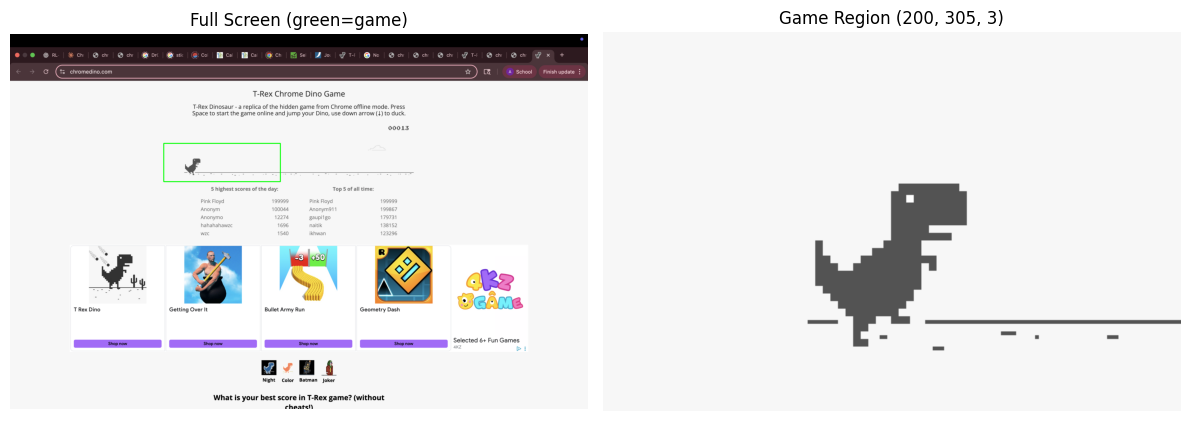

Testing environment...
Calibrating regions…
Found game region in frame 1: {'top': 566, 'left': 804, 'width': 610, 'height': 200}
Observation shape: (83, 100, 1), type: uint8
Step 1: action=2, reward=1.0, done=False
Step 2: action=1, reward=1.0, done=False
Step 3: action=0, reward=1.0, done=False
Step 4: action=0, reward=1.0, done=False
Step 5: action=1, reward=1.0, done=False
Step 6: action=1, reward=1.0, done=False
Step 7: action=2, reward=-10.0, done=True
Game over detected!
Test complete!


In [2]:
import os, time, subprocess
import cv2
import matplotlib.pyplot as plt
from envs.chrome_dino_env import ChromeDinoEnv

# 1) Open Chrome Dino
print("Opening Chrome Dino...")
try:
    # subprocess.run(["open", "-a", "Google Chrome", "chrome://dino/"], check=True)
    import webbrowser
    webbrowser.open("https://chromedino.com")
except Exception:
    import webbrowser
    webbrowser.open("https://chromedino.com")

print("Waiting for page to load...")
time.sleep(4.0)

# 2) Create environment
print("Creating environment...")
env = ChromeDinoEnv(auto_calibrate=True, monitor_index=1)

print(f"Detected game_region: {env.game_region}")

# 4) Show debug view
env.debug_show_regions()

# 5) Test basic functionality
print("Testing environment...")
obs, info = env.reset()
print(f"Observation shape: {obs.shape}, type: {obs.dtype}")


# Take a few random actions
for i in range(20):
    action = env.action_space.sample()
    obs, reward, done, truncated, info = env.step(action)
    print(f"Step {i+1}: action={action}, reward={reward}, done={done}")
    if done:
        print("Game over detected!")
        break

env.close()
print("Test complete!")

Using input backend: keyboard
Ablation config: {'blur': True, 'hist_eq': True, 'edge_enhance': False, 'temporal_stack': 1, 'obs_resolution': 'default', 'obs_channels': 'grayscale', 'reward_mode': 'sparse', 'reward_scaling': 1.0, 'action_repeat': 1, 'frame_skip': 1, 'noise_level': 0.0, 'brightness_var': 0.0, 'contrast_var': 0.0}
Observation space: (83, 100, 1)
Dino template loaded
Game Over template loaded
Calibrating regions…
Found game region in frame 2: {'top': 576, 'left': 804, 'width': 610, 'height': 200}
Calibrating regions…
Found game region in frame 1: {'top': 576, 'left': 830, 'width': 610, 'height': 200}


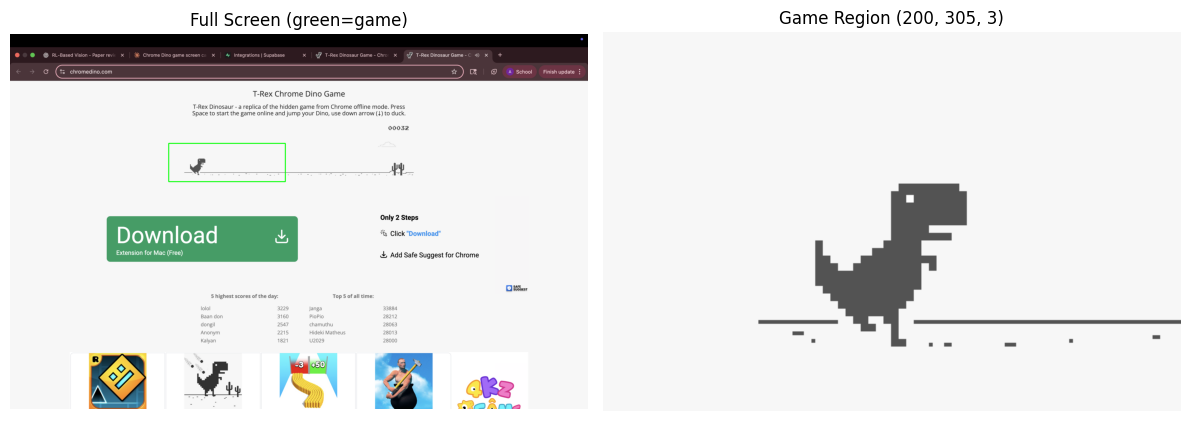

Snapshot saved under: /Users/alexkagozi/Desktop/AI/ReinforcemnentLearning/dino-RL/logs/snapshots


In [1]:
# scripts/snap_region.py
import os, time, argparse
from envs.chrome_dino_env import ChromeDinoEnv
import webbrowser
def main():
    # ap = argparse.ArgumentParser()
    # ap.add_argument("--out", default="logs/snapshots")
    # ap.add_argument("--monitor_index", type=int, default=0)
    # ap.add_argument("--auto_calibrate", type=bool, default=True)
    # args = ap.parse_args()
    out = "logs/snapshots"
    os.makedirs(out, exist_ok=True)
    webbrowser.open("https://chromedino.com")
    env = ChromeDinoEnv(
        auto_calibrate=True,
        monitor_index=0,
        debug_dump_dir="logs/snapshots",       # <<— will trigger one-shot save
        debug_dump_once=True,
        debug_tag="snap"
    )
    env.reset()
    # tiny wait so calibration can finish capturing
    time.sleep(0.5)
    # 4) Show debug view
    env.debug_show_regions()
    env.close()
    print(f"Snapshot saved under: {os.path.abspath(out)}")

if __name__ == "__main__":
    main()
